In [263]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from lorenz_gan.submodels import SubModelGAN, AR1RandomUpdater
import xarray as xr
import pickle

Text(0.5, 0, 'X distribution')

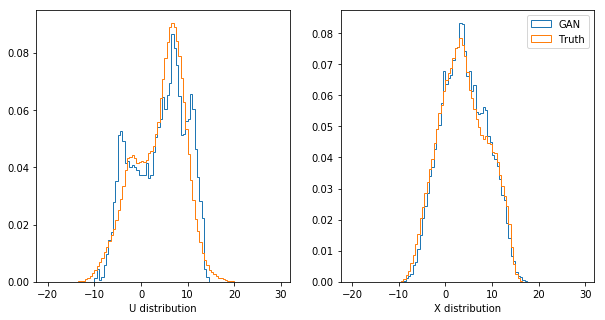

In [282]:
ds = xr.open_dataset("/Users/dgagne/lorenz_gan/exp_travis/exp_gan/00050000/lorenz_forecast_00050000_00.nc")
truth = pd.read_csv("../exp_travis/lorenz_combined_output_test.csv")
plt.figure(figsize=(10, 5))
bins = np.arange(-20, 30, 0.5)
plt.subplot(1, 2, 1)
_ = plt.hist(ds["u"].values[:, 0], bins=bins, histtype="step", density=True)
_ = plt.hist(truth["Ux_t+1"], bins=bins, histtype="step", density=True)
plt.xlabel("U distribution")
plt.subplot(1, 2, 2)
_ = plt.hist(ds["x"].values.ravel(), bins=bins, density=True, histtype="step", label="GAN")
_ = plt.hist(truth["X_t"], bins=bins, density=True, histtype="step", label="Truth")
plt.legend()
plt.xlabel("X distribution")

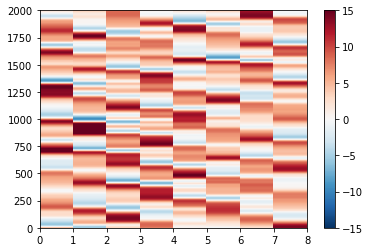

In [283]:
plt.pcolormesh(ds["x"].values[2000:4000], vmin=-15, vmax=15, cmap="RdBu_r")
plt.colorbar()
ds.close()

Text(0.5, 1.0, 'U')

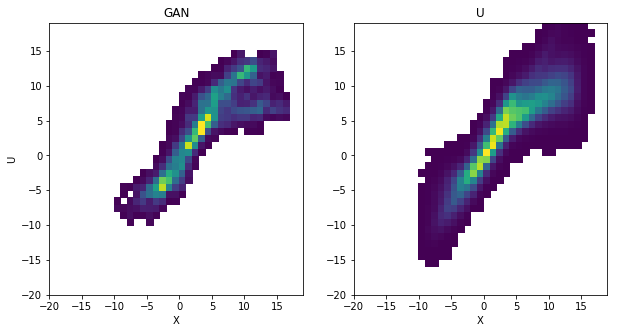

In [284]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist2d(ds["x"].values[:, 1], ds["u"].values[:, 1], cmin=1, bins=np.arange(-20, 20, 1))
plt.ylabel("U")
plt.xlabel("X")
plt.title("GAN")
plt.subplot(1, 2, 2)
plt.hist2d(truth["X_t"], truth["Ux_t+1"], bins=np.arange(-20, 20, 1), cmin=1)
plt.xlabel("X")
plt.title("U")

Text(0.5, 0, '$U_{t-1}$')

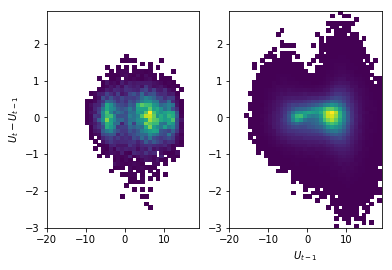

In [285]:
plt.subplot(1, 2, 1)
u_diff_bins = (np.arange(-20, 20, 1), np.arange(-3, 3, 0.1))
plt.hist2d(ds["u"].values[:-1, 1], ds["u"].values[1:, 1] - ds["u"][:-1, 1], cmin=1, bins=u_diff_bins)
plt.ylabel("$U_{t} - U_{t-1}$")
plt.subplot(1, 2, 2)
plt.hist2d(truth["Ux_t"], truth["Ux_t+1"] - truth["Ux_t"], bins=u_diff_bins, cmin=1)
plt.xlabel("$U_{t-1}$")


In [277]:
sg = SubModelGAN("../exp_travis/gan_generator_0000_epoch_0030.h5")

In [227]:
sg.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
split1d_2 (Split1D)             (None, 2)            0           input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
scale_1 (Scale)                 (None, 2)            0           split1d_2[0][0]                  
__________________________________________________________________________________________________
add_1 (Add

In [82]:
sg.model.layers[3].get_weights()

[]

In [84]:
sg.model.layers[7].get_weights()

[array([0.01016695, 0.4297482 , 0.06638762, 0.7230644 , 0.24595639,
        0.01001649, 0.01794503, 0.01001012, 0.47203645, 0.01010261,
        0.01      , 0.01041639, 0.01      , 0.01000634, 0.12028392,
        0.01006311], dtype=float32)]

In [90]:
sg.model.layers[12].get_weights()

[array([0.01      , 0.02904587, 0.01      , 0.01      , 0.01000245,
        0.01052263, 0.01000886, 0.6517645 , 0.07060938, 0.05148397,
        0.6636404 , 0.01002061, 0.6878943 , 0.07450592, 0.20481583,
        0.0112096 ], dtype=float32)]

In [89]:
sg.model.layers[12]

In [272]:
ar1 = AR1RandomUpdater()
pickle.dump(ar1, open("../exp_travis/ar1_random_updater_white.pkl", "wb"))
print(ar1.corr)

0
